In [28]:
import rioxarray  as rx# for the extension to load
import xarray

import matplotlib.pyplot as plt
import numpy as np


In [15]:
hls_path = r'C:\Users\attic\HLS_Kelp\imagery\Isla_Vista_Kelp\HLS.L30.T10SGD.2017167T183413.v2.0\HLS.L30.T10SGD.2017167T183413.v2.0.B01.tif'

dem_path = r'C:\Users\\attic\HLS_Kelp\imagery\Isla_Vista_Kelp\dem.tif'

In [16]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [3]:
xds = xarray.open_dataarray(dem_path)
xds_match = xarray.open_dataarray(hls_path)



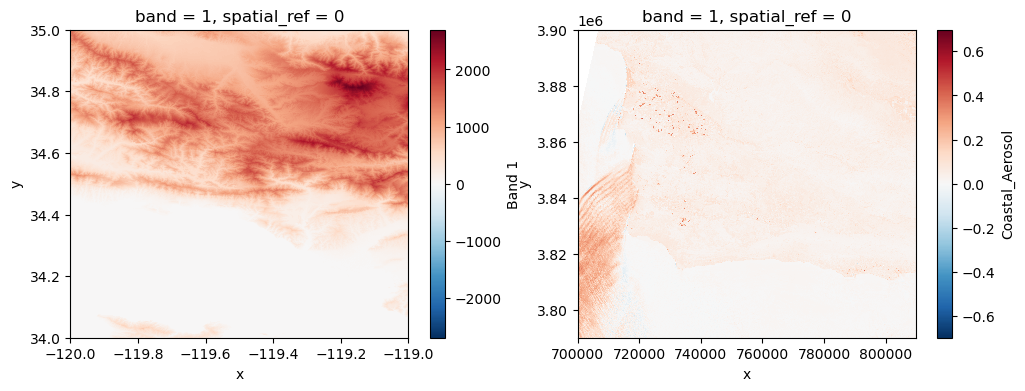

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
xds.plot(ax=axes[0])
xds_match.plot(ax=axes[1])
plt.draw()



In [18]:
xds_repr_match = xds.rio.reproject_match(xds_match)

In [19]:
xds_repr_match = xds_repr_match.assign_coords({
    "x": xds_match.x,
    "y": xds_match.y,
})
xds_sum = xds_repr_match + xds_match

In [20]:
print("Sum Raster:\n-----------\n")
print_raster(xds_sum)

Sum Raster:
-----------

shape: (3660, 3660)
resolution: (30.0, -30.0)
bounds: (699960.0, 3790200.0, 809760.0, 3900000.0)
sum: inf
CRS: EPSG:32610



c:\Users\attic\miniconda3\envs\hls_env\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


c:\Users\attic\miniconda3\envs\hls_env\lib\site-packages\matplotlib\colors.py:1370: RuntimeWarning: overflow encountered in subtract
  resdat -= vmin


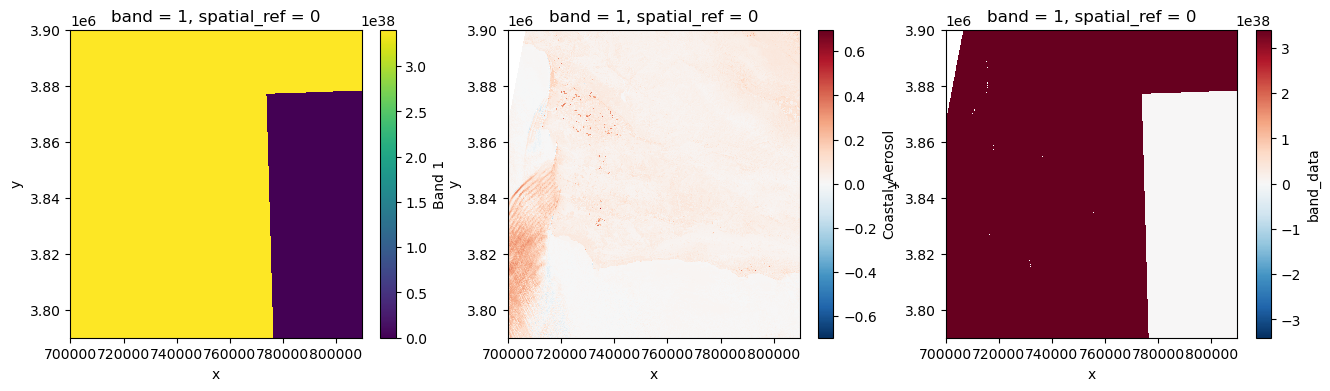

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(16,4))

xds_repr_match.plot(ax=axes[0])
xds_match.plot(ax=axes[1])
xds_sum.plot(ax=axes[2])

plt.draw()

In [29]:
xds = np.resize(xds, xds_match.shape)
dem_data = np.where(xds > 100, np.nan, xds_match)
land_mask = rx.to_raster(dem_data)


AttributeError: module 'rioxarray' has no attribute 'to_raster'

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

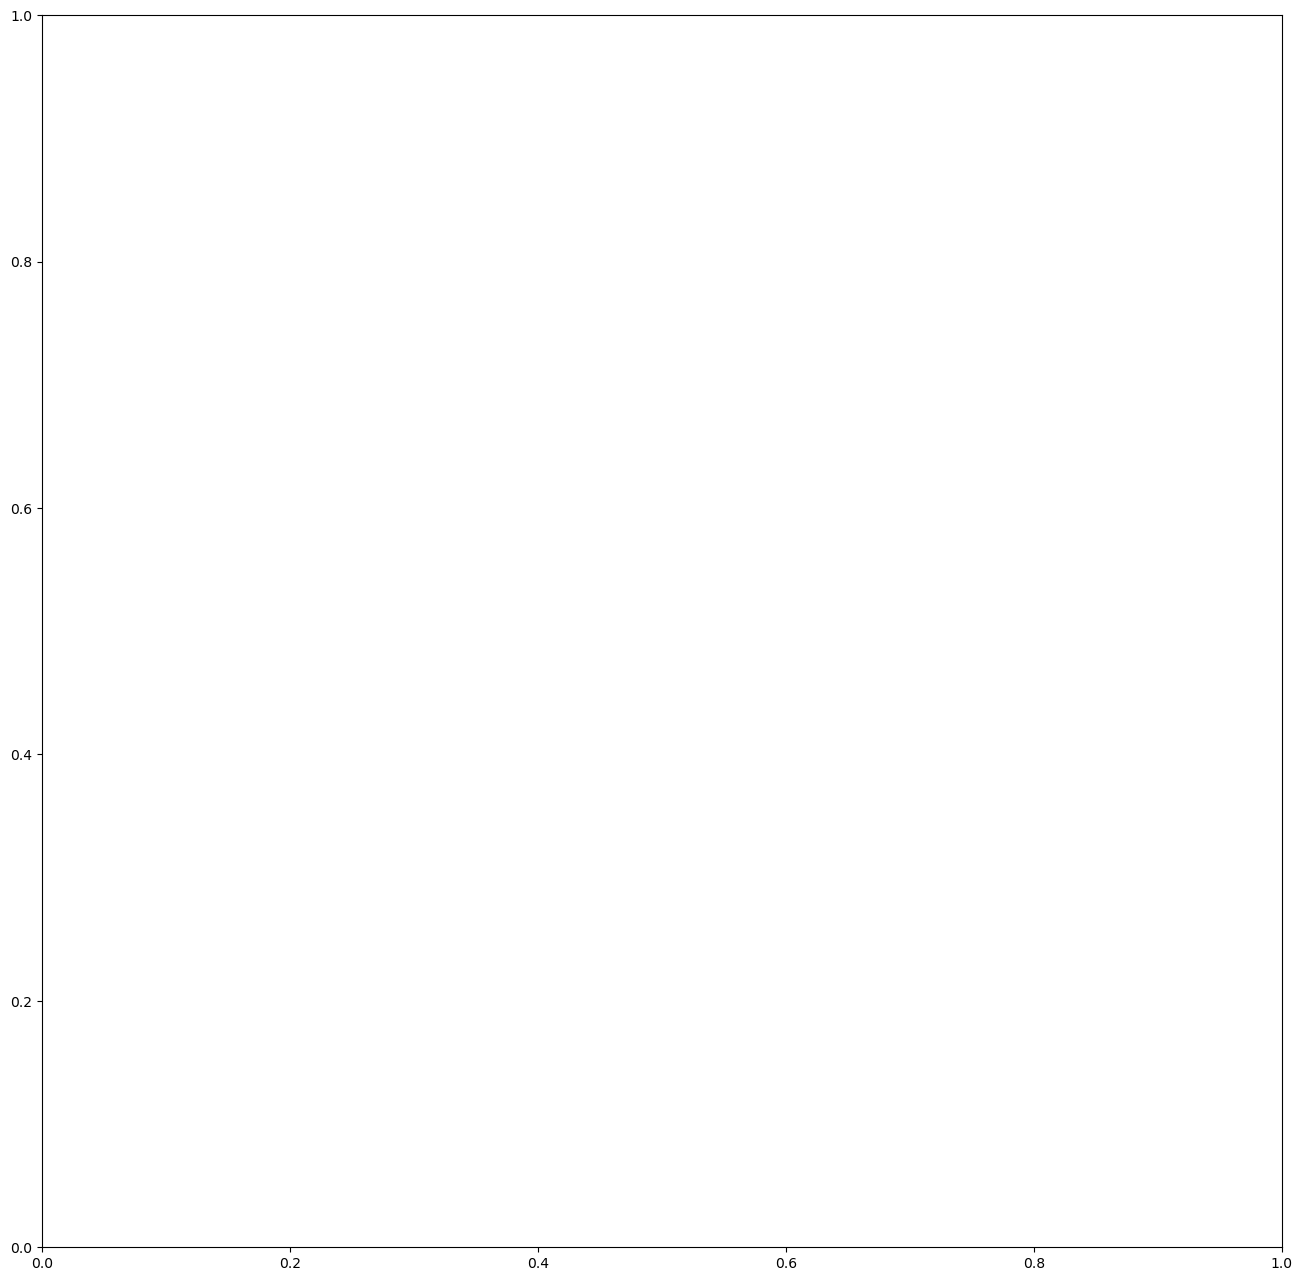

In [27]:
fig, axes = plt.subplots(ncols=1, figsize=(16,16))

dem_data.plot(ax=axes[0])
plt.draw()